In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_western_white-beige/Received_20240416/240415_Mitochondria isolation_White,Beige_OXPHOS WB_V2.xlsx', sheet_name='Sheet3').drop(columns='Complex')
oxphos_c = pd.DataFrame({'Band No.':[1,2,3,4,5], 'Complex':['V','III','IV','II','I']})
Condition = pd.DataFrame({'Lane':[1,2,3,4,5,6,7,8], 'Cell':['beige','white','beige','white','beige','white','beige','white']})
data = pd.merge(data, oxphos_c, on='Band No.', how='left')
data = pd.merge(data, Condition, on='Lane', how='left')
data = data[['Lane','Complex','Cell','Band %']]
data['Group'] = data['Cell']
# display(data)

plot_data = data[data['Complex']=='II']
display(plot_data)

,Lane,Complex,Cell,Band %,Group
3,3,II,beige,31.641034,beige
8,5,II,beige,27.340252,beige
13,7,II,beige,26.605181,beige
18,4,II,white,24.683967,white
23,6,II,white,22.963757,white
28,8,II,white,21.951965,white


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_68344/3770775288.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Group", y="Band %",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_68344/3770775288.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=plot_data, x="Group", y="Band %",


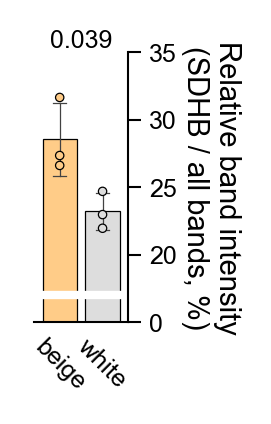

<Figure size 640x480 with 0 Axes>

In [3]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*2 +1/70*2]
height_ratios = [0.9]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])


sns.barplot(data=plot_data, x="Group", y="Band %",
            palette=['#FFCC88','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=plot_data, x="Group", y="Band %",
              palette=['#FFCC88','#DDDDDD'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)


ax.set_ylim(15,35)
ax.set_yticks([15,20,25,30,35])
ax.set_yticklabels([0,20,25,30,35])
ax.axhline(17, c='w', lw=2, clip_on=False)

ax.set_xlim(-0.6, 1.6)
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3, rotation=-45)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Relative band intensity\n(SDHB / all bands, %)', labelpad=1, rotation=-90, ha='center', va='bottom')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# Paired T-test
from scipy import stats
stat, pv = stats.ttest_ind(plot_data[plot_data['Group']=='beige']['Band %'],
                           plot_data[plot_data['Group']=='white']['Band %'])
ax.text(0.5, 35,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)


plt.savefig('OXPHOS_band_beige-white_PT-level_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()